In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
df_all=pd.read_csv('법정동데이터ver2.csv')
df_all.head()

,field_1,버스정류장수,자전거도로길이,자전거도로수,지하철역수,공원율,사고 다발 횟수,도로길이,도로수,평균경사도,추정교통량,안정성지수평균,직장인구,생활인구,자전거이용량
0,0,8,0.000000,0,0,70.44,0.0,7853.606094,51,27.666667,908.2,0.539394,121155.06,9522.102855,16882
1,1,0,0.000000,0,0,70.44,0.0,2301.024680,32,9.666667,908.2,0.000000,121155.06,9522.102855,0
2,2,0,0.000000,0,0,70.44,0.0,983.529811,16,1.666667,908.2,0.000000,121155.06,9522.102855,0
3,3,2,0.000000,0,0,70.44,0.0,1838.011626,33,1.000000,908.2,0.000000,121155.06,9522.102855,24012
4,4,1,290.058108,5,0,70.44,0.0,2002.683230,34,0.666667,908.2,0.068966,121155.06,9522.102855,32494


In [3]:
df_all=df_all.assign(
    대중교통 = lambda x: x['버스정류장수'] + x['지하철역수'],
    자전거도로수용율 = lambda x: x['자전거도로길이'] /x['도로길이'],
    인구 = lambda x:x['직장인구'] +x['생활인구']
)
df_use=df_all[['대중교통','자전거도로수용율','평균경사도','인구','추정교통량','안정성지수평균','자전거이용량']]
df_use.fillna(0,inplace=True)

C:\Anaconda3\envs\practice\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [4]:
df_cl=df_use[['자전거도로수용율','안정성지수평균']]
df_cl.isna().sum()

자전거도로수용율    0
안정성지수평균     0
dtype: int64

In [5]:
from sklearn.preprocessing import MinMaxScaler

# 두 가지 feature를 대상
data = df_use[['자전거도로수용율','안정성지수평균']]

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)

In [33]:
from sklearn.cluster import DBSCAN

model =DBSCAN(eps=0.11, min_samples=3, metric='euclidean')
# 정규화된 데이터에 학습
model.fit(data_scale)
# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
df_use['cluster'] = model.fit_predict(data_scale)

C:\Users\김부겸\AppData\Local\Temp\ipykernel_2864\2183180016.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_use['cluster'] = model.fit_predict(data_scale)


In [34]:
df_use['cluster'].unique()

array([ 0, -1,  1], dtype=int64)

In [35]:
df_use

,대중교통,자전거도로수용율,평균경사도,인구,추정교통량,안정성지수평균,자전거이용량,cluster
0,8,0.000000,27.666667,1.306772e+05,908.2,0.539394,16882,0
1,0,0.000000,9.666667,1.306772e+05,908.2,0.000000,0,0
2,0,0.000000,1.666667,1.306772e+05,908.2,0.000000,0,0
3,2,0.000000,1.000000,1.306772e+05,908.2,0.000000,24012,0
4,1,0.144835,0.666667,1.306772e+05,908.2,0.068966,32494,0
...,...,...,...,...,...,...,...,...
462,41,0.177626,5.000000,9.281510e+05,45593.0,0.592944,295388,0
463,32,0.241067,2.333333,1.291689e+06,69951.0,0.690722,287342,0
464,61,0.176436,0.333333,3.045575e+06,40420.0,0.804035,1236036,0
465,54,0.147195,2.333333,1.560991e+06,31903.0,0.708297,719840,0


In [36]:
df_use.groupby('cluster').agg(['mean','size'])

대중교통       자전거도로수용율          평균경사도                 인구       \
              mean size      mean size      mean size          mean size   
cluster                                                                    
-1        9.166667    6  0.759179    6  3.888889    6  1.430498e+06    6   
 0       24.958333  456  0.071786  456  5.050439  456  1.205411e+06  456   
 1       42.400000    5  0.613456    5  6.466667    5  8.758176e+06    5   

                추정교통량        안정성지수평균              자전거이용량       
                 mean size      mean size           mean size  
cluster                                                        
-1       10551.788889    6  1.103681    6  194313.666667    6  
 0       13211.255702  456  0.653696  456  183540.267544  456  
 1       43913.733333    5  1.335940    5  835881.600000    5

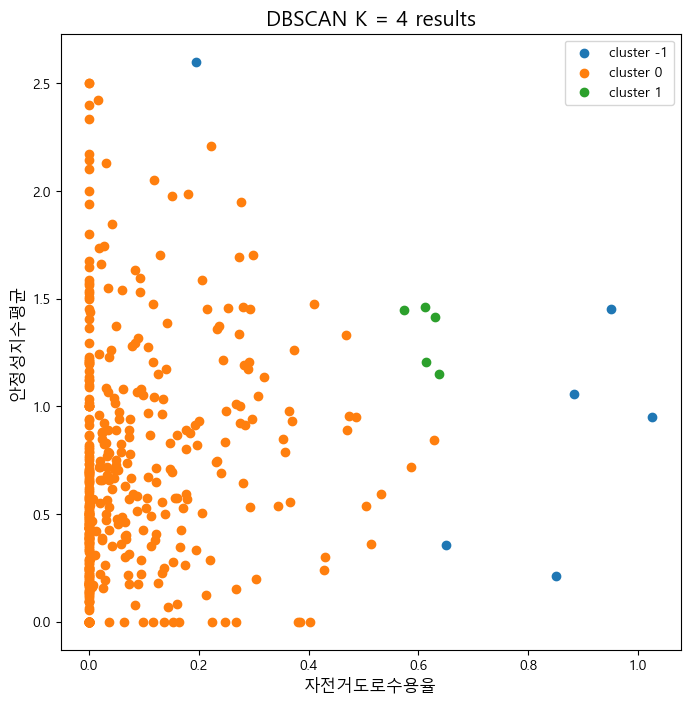

In [38]:
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize = (8, 8))
k= 4
for i in [-1,0,1]:
    plt.scatter(df_use.loc[df_use['cluster'] == i, '자전거도로수용율'], df_use.loc[df_use['cluster'] == i, '안정성지수평균'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('DBSCAN K = %d results'%k , size = 15)
plt.xlabel('자전거도로수용율', size = 12)
plt.ylabel('안정성지수평균', size = 12)
plt.show()